In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "weatherAUS.csv"
df = pd.read_csv(file_path)



In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("weatherAUS_cleaned.csv")

# Count rows with at least one NaN value
rows_with_na = df.isna().any(axis=1).sum()

print(f"Number of rows containing at least one NaN value: {rows_with_na}")


Number of rows containing at least one NaN value: 0


In [3]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Drop columns with more than 50% missing values
df_cleaned = df.dropna(thresh=len(df) * 0.5, axis=1)


In [4]:
df.shape

(198745, 18)

In [5]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,W,44,W,WNW,20,24,71,22,1007.7,1007.1,16.9,21.8,No,0.0,No
1,7.4,25.1,0.0,WNW,44,NNW,WSW,4,22,44,25,1010.6,1007.8,17.2,24.3,No,0.0,No
2,12.9,25.7,0.0,WSW,46,W,WSW,19,26,38,30,1007.6,1008.7,21.0,23.2,No,0.0,No
3,9.2,28.0,0.0,NE,24,SE,E,11,9,45,16,1017.6,1012.8,18.1,26.5,No,1.0,No
4,17.5,32.3,1.0,W,41,ENE,NW,7,20,82,33,1010.8,1006.0,17.8,29.7,No,0.2,No


In [6]:
df.shape

(198745, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198745 entries, 0 to 198744
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        198745 non-null  float64
 1   MaxTemp        198745 non-null  float64
 2   Rainfall       198745 non-null  float64
 3   WindGustDir    198745 non-null  object 
 4   WindGustSpeed  198745 non-null  int64  
 5   WindDir9am     198745 non-null  object 
 6   WindDir3pm     198745 non-null  object 
 7   WindSpeed9am   198745 non-null  int64  
 8   WindSpeed3pm   198745 non-null  int64  
 9   Humidity9am    198745 non-null  int64  
 10  Humidity3pm    198745 non-null  int64  
 11  Pressure9am    198745 non-null  float64
 12  Pressure3pm    198745 non-null  float64
 13  Temp9am        198745 non-null  float64
 14  Temp3pm        198745 non-null  float64
 15  RainToday      198745 non-null  object 
 16  RISK_MM        198745 non-null  float64
 17  RainTomorrow   198745 non-nul

Missing Values:
 MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

Model Performance:
                     Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.999975   1.000000  0.999885  0.999943
1           Random Forest  1.000000   1.000000  1.000000  1.000000
2  Support Vector Machine  0.999698   0.999885  0.998736  0.999310
3       Gradient Boosting  1.000000   1.000000  1.000000  1.000000
4     K-Nearest Neighbors  0.896249   0.856608  0.631724  0.727177


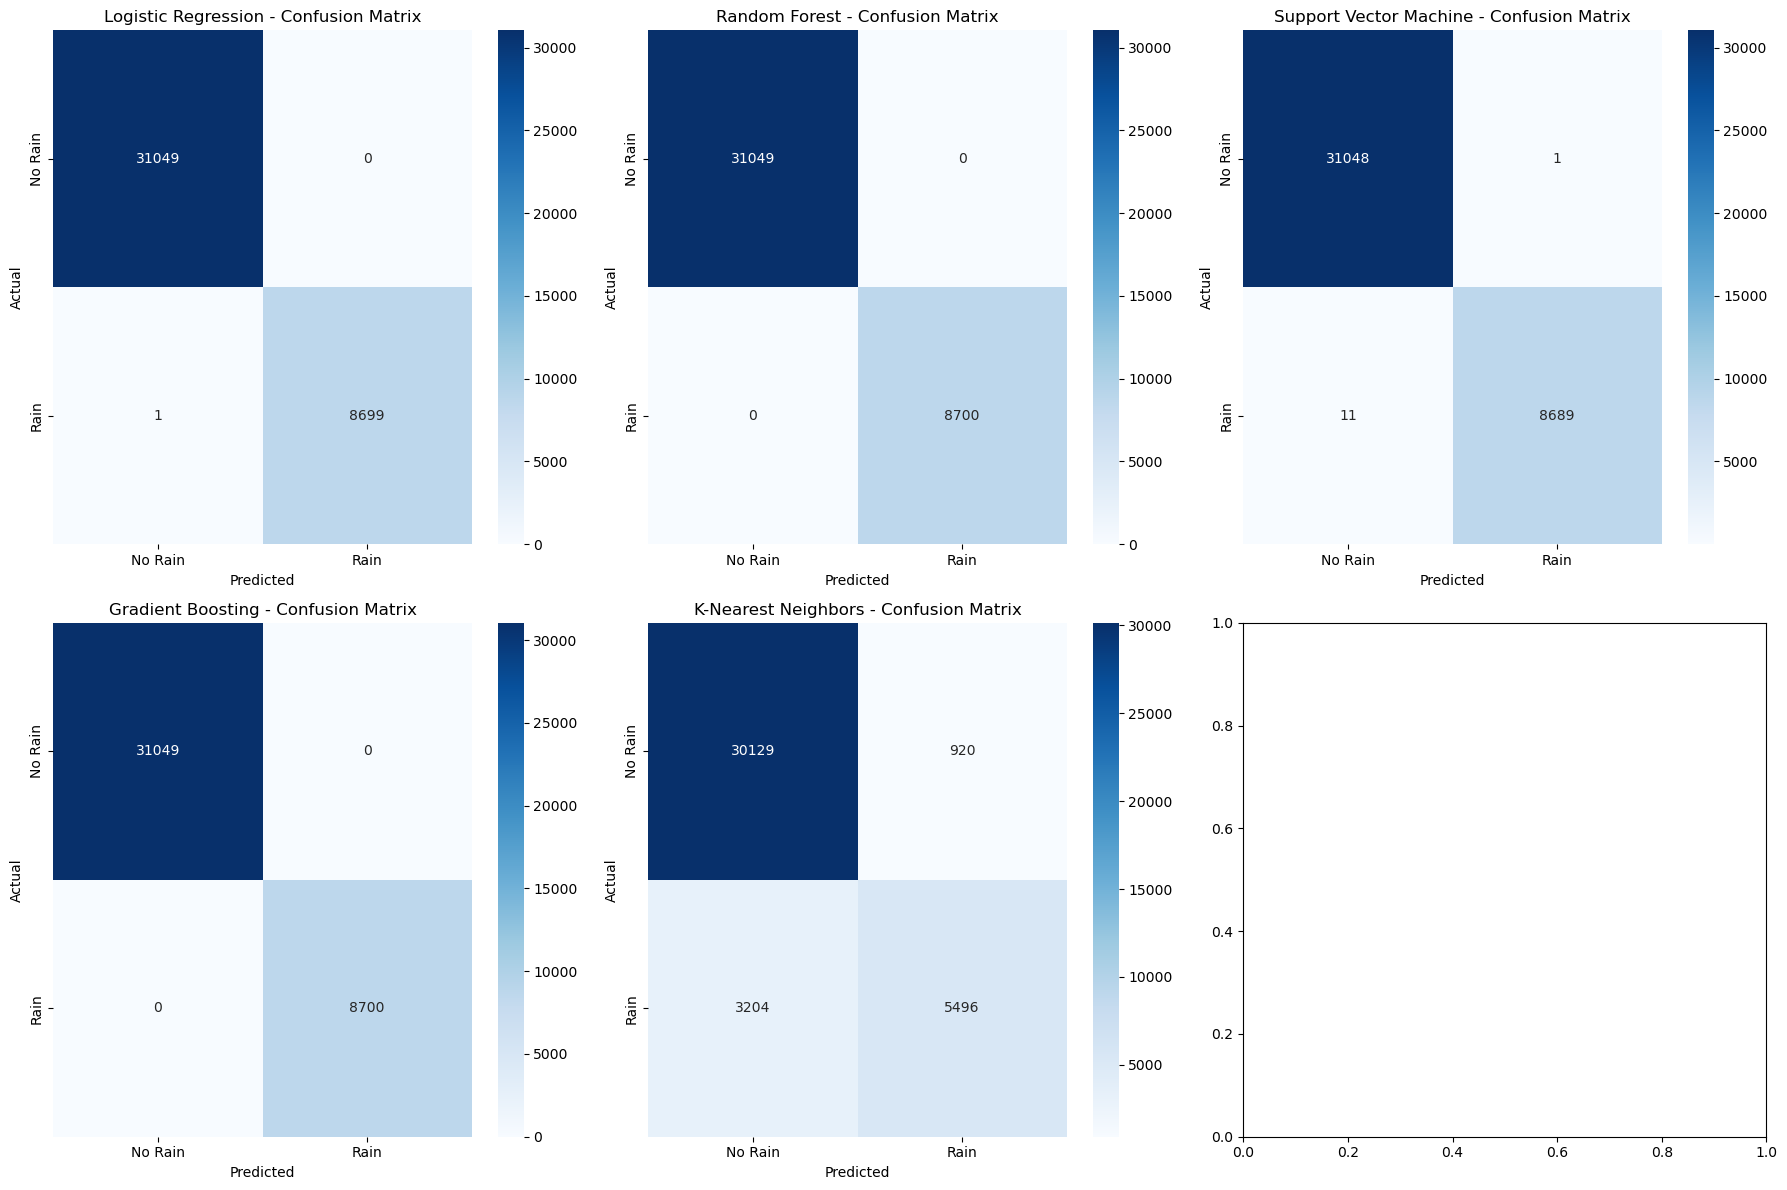

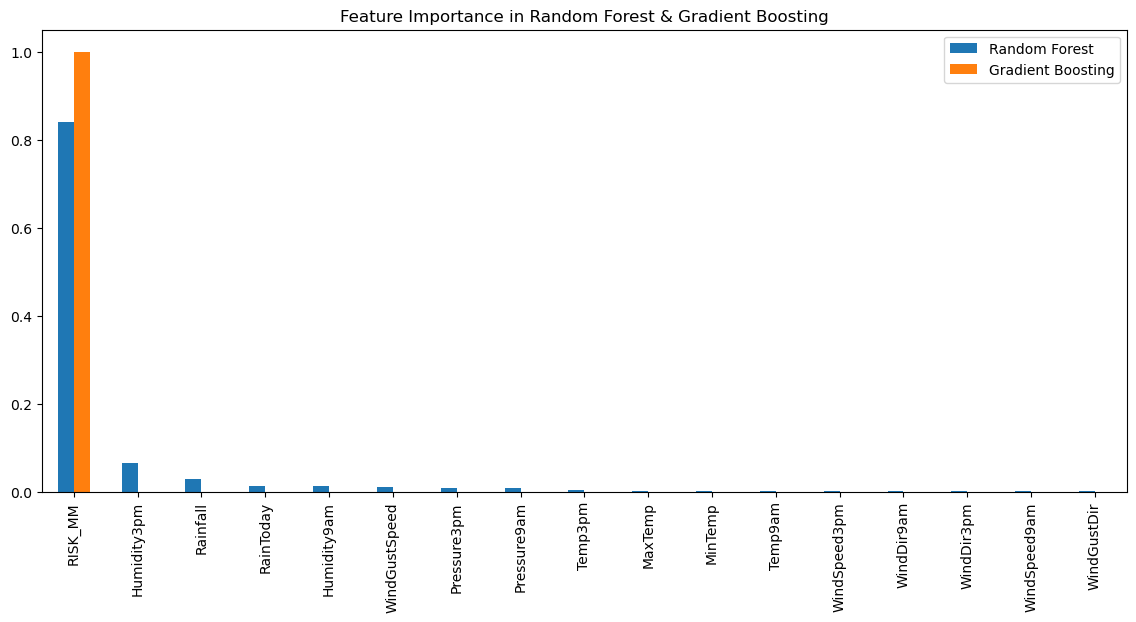

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load cleaned dataset
file_path = "weatherAUS_cleaned.csv"  # Ensure the file path is correct
df = pd.read_csv(file_path)

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Encode categorical variables
categorical_cols = ["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future use

# Define features and target variable
features = [col for col in df.columns if col not in ["RainTomorrow"]]
X = df[features]
y = df["RainTomorrow"]

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define machine learning models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel="linear", probability=True),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Train models and evaluate performance
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append((name, accuracy, precision, recall, f1))




Model Performance:
                     Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.999975   1.000000  0.999885  0.999943
1           Random Forest  1.000000   1.000000  1.000000  1.000000
2  Support Vector Machine  0.999698   0.999885  0.998736  0.999310
3       Gradient Boosting  1.000000   1.000000  1.000000  1.000000
4     K-Nearest Neighbors  0.896249   0.856608  0.631724  0.727177


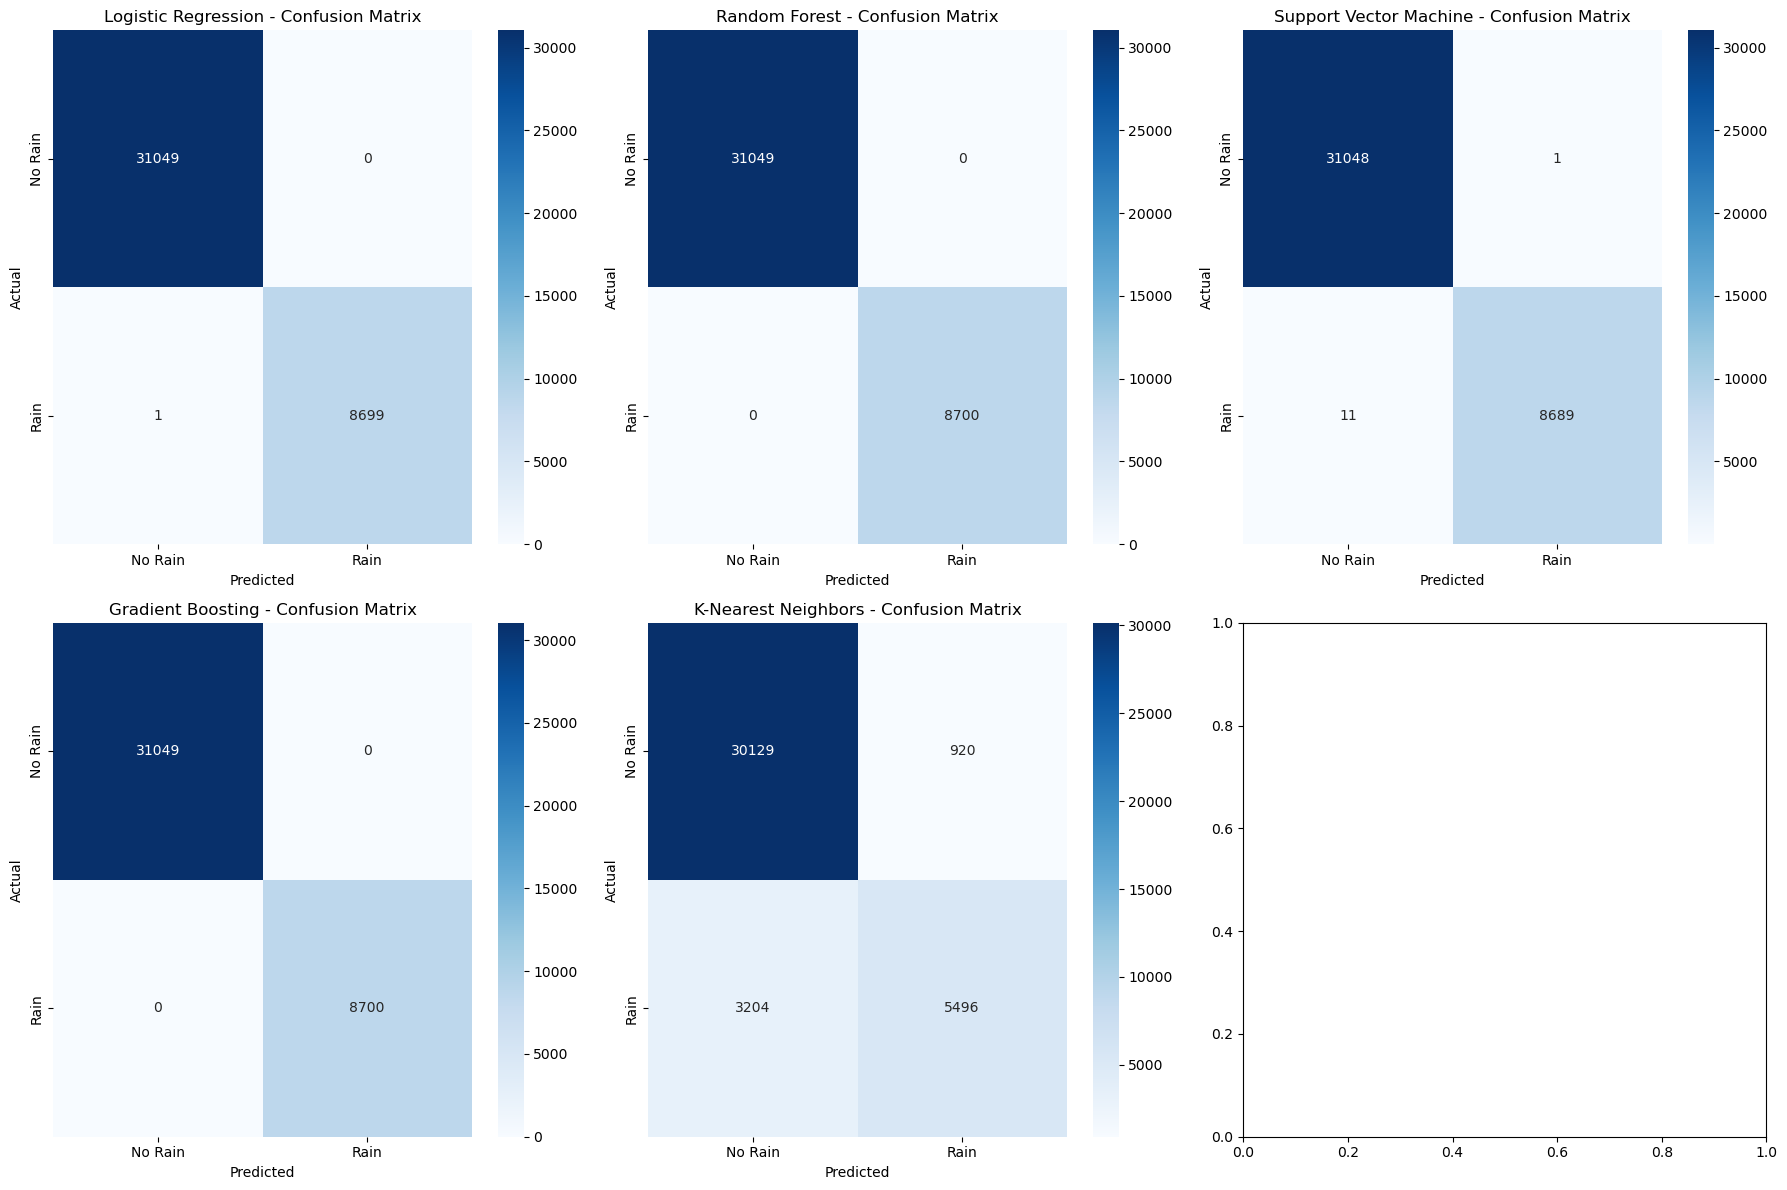

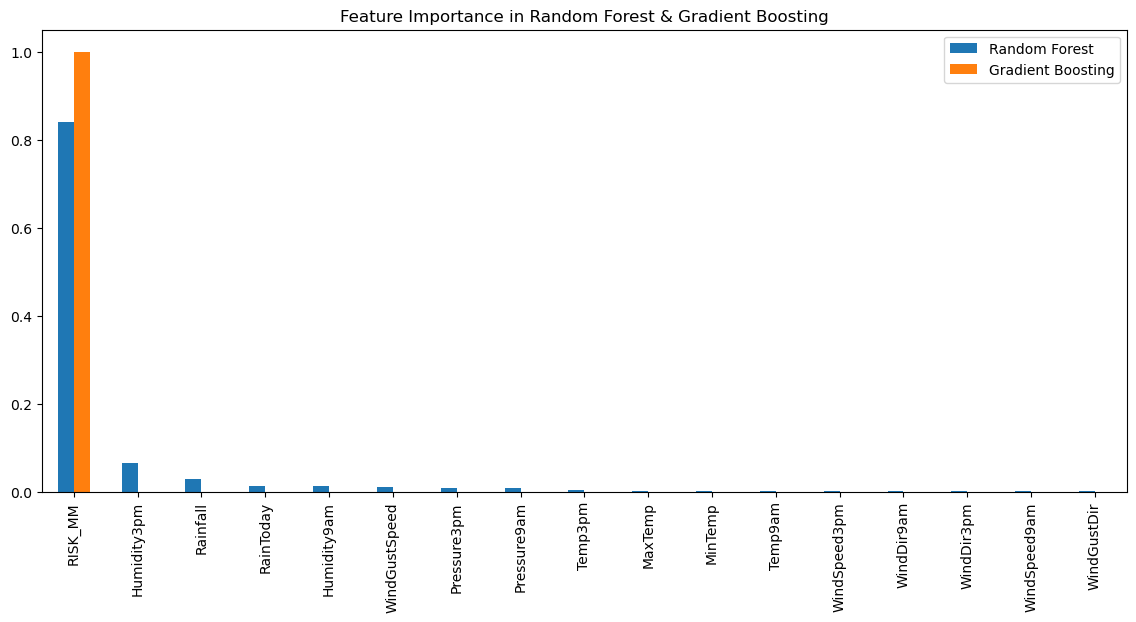

In [9]:
# Convert results to DataFrame and print
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print("\nModel Performance:\n", results_df)

# Function to plot confusion matrices
def plot_confusion_matrices(models, X_test, y_test):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()

    for i, (name, model) in enumerate(models.items()):
        if i >= 5:  # Limit to 5 models
            break

        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"], ax=axes[i])
        axes[i].set_title(f"{name} - Confusion Matrix")
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("Actual")

    plt.tight_layout()
    plt.show()

# Function to plot feature importance (for Random Forest & Gradient Boosting)
def plot_feature_importance(models, feature_names):
    feature_importance = {}

    for name in ["Random Forest", "Gradient Boosting"]:
        if name in models and hasattr(models[name], "feature_importances_"):
            feature_importance[name] = models[name].feature_importances_

    if feature_importance:
        feature_importance_df = pd.DataFrame(feature_importance, index=feature_names)
        feature_importance_df = feature_importance_df.sort_values(by="Random Forest", ascending=False)

        feature_importance_df.plot(kind="bar", figsize=(14, 6), 
                                   title="Feature Importance in Random Forest & Gradient Boosting")
        plt.show()

# Call functions to generate confusion matrices and feature importance plots
plot_confusion_matrices(models, X_test, y_test)
plot_feature_importance(models, df.columns[:-1])
